# Project: Investigate a Dataset (M Brendel - FBI Gun Data - Nov 2018)

### To my reviewer: I was penalized for leaving pre-existing markdown tips (& instructor notes) in my project for my first submission. I realize that removing these tips is one of the rubric guidelines, but I purposefully keep them because I want to have them as a reference if I ever come back to this project as a tool. I want to ensure I meet all rubric criteria and the tips and organization helps me do so. I don't see how keeping the tips detracts from my content understanding at all. I'd be happy to take this up with Udacity management. Thanks for your consideration.
### Additionally, I was penalized for not discussing limitations to the data. I believe I already had in my first submission, but I have added a couple more notes on this and bolded them for quick reference.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [228]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

###### Motivation
I have chosen the FBI gun data set because 1) I served in the Navy and have experience with weapons and managing violence and 2) I find it really sad that America has such an active shooter problem. I'd like to better understand the requirements for determining who can purchase guns.

###### Questions to ask
1) What census data is most associated with high gun per capita? <br>
2) Which states have had the highest growth in gun registrations? <br>
3) What is the overall trend of gun purchases?

###### Variables of interest
Dependent: Firearm check totals (proxy for purchases), permits <br>
Independent: Time (year/month), State, various Census factors

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [229]:
# Load original data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gun_orig = pd.read_csv('gun_data.csv')
df_census_orig = pd.read_csv('U.S. Census Data.csv')

### Data Cleaning
I dive right into cleaning after seeing an overview of the datasets, and discuss each step in the process in either markdown or code comments below. This was Project 1 (Lesson 1) during my Data Analyst Nanodegree. We didn't learn about assessing (writing out) cleaning steps prior to carrying them out until Lesson 4- Data Wrangling. Please don't penalize me for not writing out a bunch of pre-steps; Udacity hadn't taught us to do that yet. I saw what I needed to do and annotated as I did it.

#### I'll explore/clean the gun data set first and then the Census one.

In [230]:
# visualize first few lines
df_gun_orig.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [262]:
df_gun_orig.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


From describing the data, above, we see that many of the columns have very similar profiles (e.g. private_sale_handgun and private_sale_long_gun). Since the intent of this project is to analyze higher-level questions relating the gun and census datasets, we can likely remove some of the superfluous columns so that we pare the table down to only the data of interest.

In [231]:
# check data types & quality
df_gun_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

Drop indicated columns from gun data set since they will not be needed to answer the higher-level questions we have posed + they are missing a considerable amount of data (**limitation**) + we're not sure what they mean exactly without documentation:

In [232]:
# axis = 1 specifies to drop columns, not rows; semi-column hides output
df_gun = df_gun_orig.drop(['permit_recheck', 'other',
       'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis=1);
# check
df_gun.head()

,month,state,permit,handgun,long_gun,multiple,admin,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,0.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,160,0.0,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,0.0,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,51.0,17747
4,2017-09,California,57839.0,37165.0,24581.0,0,0.0,123506


In [233]:
# I know I will want an additional column that will only have the year, so I will create that now
df_gun['year'] = df_gun['month'].str.extract('(\d{4})')
# check
df_gun.head(3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,month,state,permit,handgun,long_gun,multiple,admin,totals,year
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,0.0,32019,2017
1,2017-09,Alaska,209.0,2320.0,2930.0,160,0.0,6303,2017
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,0.0,28394,2017


In [234]:
# check for dupes - 0 means none
sum(df_gun.duplicated())

0

In [235]:
# check how much data is still missing
df_gun.isnull().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
multiple     0
admin       23
totals       0
year         0
dtype: int64

In [236]:
# replace empty/NA cells with mean from rest of dataset
mean = df_gun.mean()
df_gun.fillna(mean, inplace=True);
# check - should be false if no missing data
df_gun.isnull().sum().any()

False

In [237]:
# adjust data types

# floats/strs to ints
float_cols = ['permit', 'handgun', 'long_gun', 'admin', 'year'];
for c in float_cols:
    df_gun[c] = df_gun[c].astype(int)

# str to datetime
df_gun['month'] = pd.to_datetime(df_gun['month'])

# check
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
month       12485 non-null datetime64[ns]
state       12485 non-null object
permit      12485 non-null int64
handgun     12485 non-null int64
long_gun    12485 non-null int64
multiple    12485 non-null int64
admin       12485 non-null int64
totals      12485 non-null int64
year        12485 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 877.9+ KB


#### Exploring and cleaning Census data:

In [238]:
# visualize first few lines
df_census_orig.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [239]:
# check data types & quality
df_census_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

Drop indicated data from census data set since they will not be needed to answer our questions and/or they are only documentation:

In [240]:
# transpose census data so that I can merge it later with the gun data using state as the key
df_census_trans = df_census_orig.set_index('Fact').T;
df_census_trans.head()

# define df as only cols need for analysis
# will only use 2016 vars from census data to simplify analysis and make apple to apple comparisons
cols_want = ["Population estimates, July 1, 2016,  (V2016)",
"Persons under 5 years, percent, July 1, 2016,  (V2016)",
"Persons under 18 years, percent, July 1, 2016,  (V2016)",
"Persons 65 years and over, percent,  July 1, 2016,  (V2016)",
"Female persons, percent,  July 1, 2016,  (V2016)",
"White alone, percent, July 1, 2016,  (V2016)",
"Black or African American alone, percent, July 1, 2016,  (V2016)",
"American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)",
"Asian alone, percent, July 1, 2016,  (V2016)",
"Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)",
"Two or More Races, percent, July 1, 2016,  (V2016)",
"Hispanic or Latino, percent, July 1, 2016,  (V2016)",
"White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)",
"Housing units,  July 1, 2016,  (V2016)",
"Building permits, 2016"]
df_census = df_census_trans[cols_want]

# get rid of 'fact note' row as it's just documentation
# personal note: not sure why we have to specify the dataframe again before .index
df_census = df_census.drop(df_census.index[0:1])
#check
df_census

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"
Alaska,"741,894",7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","1,503"
Arizona,"6,931,071",6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","35,578"
Arkansas,"2,988,248",6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","9,474"
California,"39,250,017",6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","102,350"
Colorado,"5,540,545",6.10%,22.80%,13.40%,49.70%,87.50%,4.50%,1.60%,3.30%,0.20%,3.00%,21.30%,68.60%,"2,339,118","38,974"
Connecticut,"3,576,452",5.20%,21.10%,16.10%,51.20%,80.60%,11.80%,0.50%,4.70%,0.10%,2.30%,15.70%,67.70%,"1,499,116","5,504"
Delaware,"952,065",5.80%,21.50%,17.50%,51.60%,70.10%,22.60%,0.60%,4.00%,0.10%,2.60%,9.20%,62.90%,"426,149","5,804"
Florida,"20,612,439",5.50%,20.10%,19.90%,51.10%,77.60%,16.80%,0.50%,2.90%,0.10%,2.10%,24.90%,54.90%,"9,301,642","116,240"
Georgia,"10,310,371",6.40%,24.40%,13.10%,51.30%,61.20%,32.00%,0.50%,4.10%,0.10%,2.10%,9.40%,53.40%,"4,218,776","51,675"


In [241]:
# Nov 25: Malak A posted a very helpful github soln to my question that got me unstuck
# need to use syntax below instead of .str.replace() that lessons had taught
for c in df_census.columns:
    df_census[c].replace({",|\%|\$|\"|Z|\s": ''}, regex= True, inplace=True)
df_census

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300,6.00,22.60,16.10,51.60,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,2230185,15001
Alaska,741894,7.30,25.20,10.40,47.70,66.10,3.80,15.20,6.30,1.30,7.30,7.00,61.20,310658,1503
Arizona,6931071,6.30,23.50,16.90,50.30,83.30,4.90,5.40,3.40,0.30,2.80,30.90,55.50,2961003,35578
Arkansas,2988248,6.40,23.60,16.30,50.90,79.40,15.70,1.00,1.60,0.30,2.00,7.30,72.90,1354762,9474
California,39250017,6.30,23.20,13.60,50.30,72.70,6.50,1.70,14.80,0.50,3.80,38.90,37.70,14060525,102350
Colorado,5540545,6.10,22.80,13.40,49.70,87.50,4.50,1.60,3.30,0.20,3.00,21.30,68.60,2339118,38974
Connecticut,3576452,5.20,21.10,16.10,51.20,80.60,11.80,0.50,4.70,0.10,2.30,15.70,67.70,1499116,5504
Delaware,952065,5.80,21.50,17.50,51.60,70.10,22.60,0.60,4.00,0.10,2.60,9.20,62.90,426149,5804
Florida,20612439,5.50,20.10,19.90,51.10,77.60,16.80,0.50,2.90,0.10,2.10,24.90,54.90,9301642,116240
Georgia,10310371,6.40,24.40,13.10,51.30,61.20,32.00,0.50,4.10,0.10,2.10,9.40,53.40,4218776,51675


In [242]:
# convert dtype from str to numeric
df_census = df_census.apply(pd.to_numeric)
# check
df_census.dtypes

Fact
Population estimates, July 1, 2016,  (V2016)                                           int64
Persons under 5 years, percent, July 1, 2016,  (V2016)                               float64
Persons under 18 years, percent, July 1, 2016,  (V2016)                              float64
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                          float64
Female persons, percent,  July 1, 2016,  (V2016)                                     float64
White alone, percent, July 1, 2016,  (V2016)                                         float64
Black or African American alone, percent, July 1, 2016,  (V2016)                     float64
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)             float64
Asian alone, percent, July 1, 2016,  (V2016)                                         float64
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)    float64
Two or More Races, percent, July 1, 2016,  (V2016)               

In [243]:
# some of the percentage stats need to be multiplied by 100 because they were listed as decimals
df_census.loc['New Mexico':'Tennessee','Persons under 5 years, percent, July 1, 2016,  (V2016)':'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)'] *= 100
# check
df_census

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
Alaska,741894,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503
Arizona,6931071,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578
Arkansas,2988248,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762,9474
California,39250017,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525,102350
Colorado,5540545,6.1,22.8,13.4,49.7,87.5,4.5,1.6,3.3,0.2,3.0,21.3,68.6,2339118,38974
Connecticut,3576452,5.2,21.1,16.1,51.2,80.6,11.8,0.5,4.7,0.1,2.3,15.7,67.7,1499116,5504
Delaware,952065,5.8,21.5,17.5,51.6,70.1,22.6,0.6,4.0,0.1,2.6,9.2,62.9,426149,5804
Florida,20612439,5.5,20.1,19.9,51.1,77.6,16.8,0.5,2.9,0.1,2.1,24.9,54.9,9301642,116240
Georgia,10310371,6.4,24.4,13.1,51.3,61.2,32.0,0.5,4.1,0.1,2.1,9.4,53.4,4218776,51675


**Student note**: I realize that merging the gun and census data sets does not abide by the tidiness rules for clean data, but we didn't learn how to run calculations or make charts that compare an entire df or series to singular data points in these lessons, as we would ideally want to with this research question (i.e. gun dataset is time-series while (reliable) census data here is isolated to 2016). In an ideal world, I would keep the gun and census data sets separate.

In [244]:
# merge census and gun data sets
df_combined = df_census.merge(df_gun, how='inner', left_index=True, right_on='state');
df_combined.head(20)

,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)",...,"Building permits, 2016",month,state,permit,handgun,long_gun,multiple,admin,totals,year
0,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-09-01,Alabama,16717,5734,6320,317,0,32019,2017
55,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-08-01,Alabama,19733,6289,6045,311,0,35038,2017
110,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-07-01,Alabama,18042,6046,4790,258,0,31474,2017
165,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-06-01,Alabama,19508,8275,4782,334,0,35687,2017
220,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-05-01,Alabama,18538,7198,4559,309,0,33331,2017
275,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-04-01,Alabama,17958,7131,4724,261,0,32652,2017
330,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-03-01,Alabama,27666,10603,6951,387,0,48769,2017
385,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-02-01,Alabama,23900,10739,7028,505,0,46251,2017
440,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-01-01,Alabama,25093,6770,6572,278,0,41542,2017
495,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2016-12-01,Alabama,26996,13733,17519,533,0,62014,2016


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What census data is most associated with high gun per capita?

>**Analyst Assumption**: I will use the totals column of the gun data set to proxy gun registration / ownership.

In [245]:
# refresh memory on merged gun and census data
df_combined.head()

,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)",...,"Building permits, 2016",month,state,permit,handgun,long_gun,multiple,admin,totals,year
0,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-09-01,Alabama,16717,5734,6320,317,0,32019,2017
55,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-08-01,Alabama,19733,6289,6045,311,0,35038,2017
110,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-07-01,Alabama,18042,6046,4790,258,0,31474,2017
165,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-06-01,Alabama,19508,8275,4782,334,0,35687,2017
220,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,15001,2017-05-01,Alabama,18538,7198,4559,309,0,33331,2017


In [246]:
# will only use 2016 gun data since our census stats are most robust from 2016; also want apple to apple comparison
# for calculating guns per capita
df_2016 = df_combined.query('year =="2016"')
df_2016.shape

(600, 24)

In [247]:
# calculate gun per capita
df_2016['gun_capita'] = df_combined['totals'] / df_combined['Population estimates, July 1, 2016,  (V2016)']
# check
df_2016.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)",...,month,state,permit,handgun,long_gun,multiple,admin,totals,year,gun_capita
495,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,2016-12-01,Alabama,26996,13733,17519,533,0,62014,2016,0.012751
550,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,2016-11-01,Alabama,22628,10214,13470,599,5,50477,2016,0.010379
605,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,2016-10-01,Alabama,22979,7757,8865,429,0,43251,2016,0.008893
660,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,2016-09-01,Alabama,22014,7125,8449,372,0,41336,2016,0.008500
715,4863300,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,2016-08-01,Alabama,22987,8243,7808,384,0,42455,2016,0.008730


In [248]:
# observe how it's distributed
df_2016.gun_capita.describe()

count    600.000000
mean       0.008141
std        0.009836
min        0.000799
25%        0.004732
50%        0.006622
75%        0.008983
max        0.089489
Name: gun_capita, dtype: float64

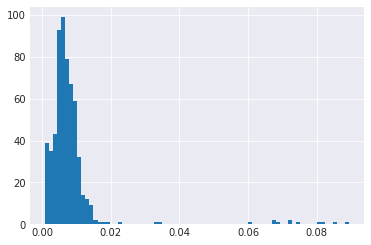

In [249]:
# observe how it's distributed visually via histogram
df_2016.gun_capita.hist(bins=75)

What we see in the above histogram is that most people do not own guns. There is a mean of 0.00814 guns per person across the dataset.<br>

Next, we'll aggregate guns per capita (gun_capita) and the census variables we're interested in by state into a new df.

In [250]:
gpc = pd.DataFrame(df_2016.groupby('state')['gun_capita'].mean())
census_vars = ["Persons under 5 years, percent, July 1, 2016,  (V2016)",
"Persons under 18 years, percent, July 1, 2016,  (V2016)",
"Persons 65 years and over, percent,  July 1, 2016,  (V2016)",
"Female persons, percent,  July 1, 2016,  (V2016)",
"White alone, percent, July 1, 2016,  (V2016)",
"Black or African American alone, percent, July 1, 2016,  (V2016)",
"American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)",
"Asian alone, percent, July 1, 2016,  (V2016)",
"Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)",
"Two or More Races, percent, July 1, 2016,  (V2016)",
"Hispanic or Latino, percent, July 1, 2016,  (V2016)",
"White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)",
"Housing units,  July 1, 2016,  (V2016)",
"Building permits, 2016"]
for c in census_vars:
    gpc[c] = df_2016.groupby('state')[c].mean()
# check
gpc.head()

,gun_capita,"Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
state,,,,,,,,,,,,,,,
Alabama,0.010571,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
Alaska,0.009845,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503
Arizona,0.005005,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578
Arkansas,0.007418,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762,9474
California,0.005047,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525,102350


In [251]:
# find states with highest and lowest gun_capita
print('Max: ' + gpc['gun_capita'].argmax() + ", Min: " + gpc['gun_capita'].argmin())

Max: Kentucky, Min: Hawaii


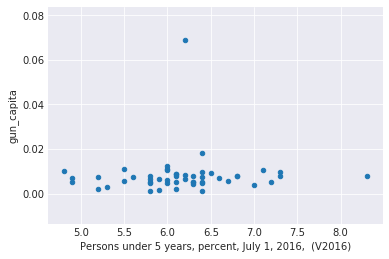

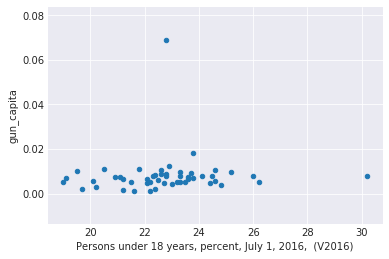

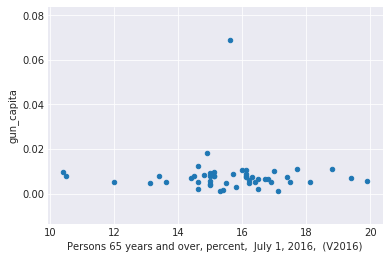

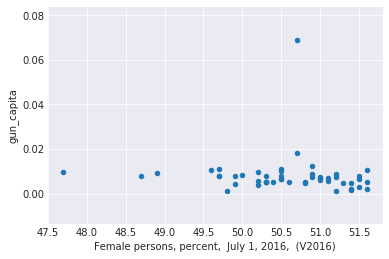

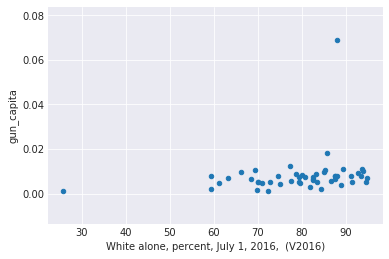

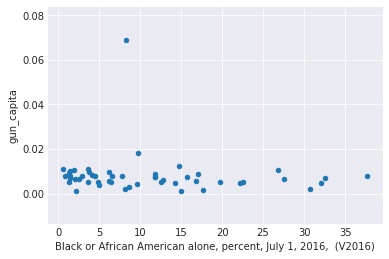

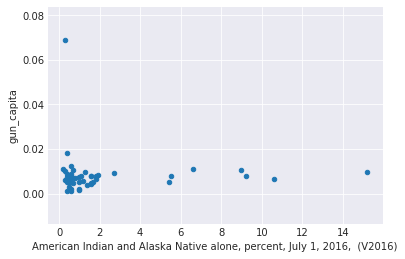

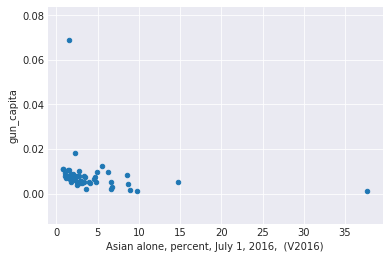

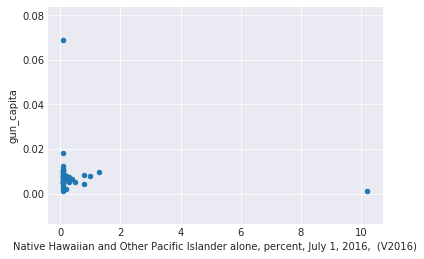

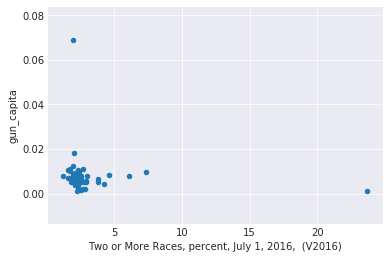

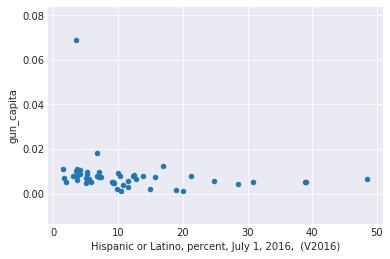

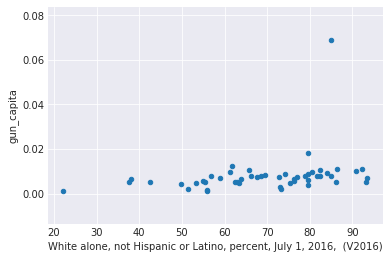

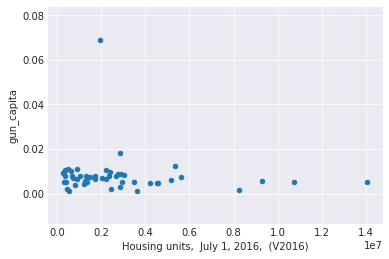

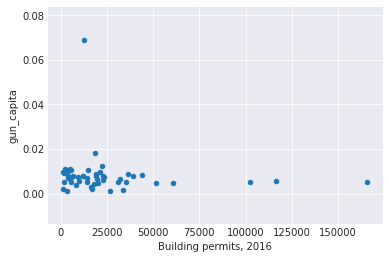

In [252]:
# run scatterplots for each census variable versus gun_capita to assess the association
for c in census_vars:
    gpc.plot(x=c, y='gun_capita', kind='scatter')

What we see above is that no census variable in particular seems to have a significantly positive or negative relationship with gun_capita. Visually, we see that most of the data points are clumped around the 0.01 gun_capita mark, with a prominent outlier sitting above 0.06 (Kentucky).

#### Note to reviewer:
The first person who reviewed my project marked it as 'needing attention' and said I should have replaced the above scatterplots with histograms; verbatim comment:<br>

"Please change your scatter charts to histograms. It would make much sense by that way. The scatter chart is mostly used to find the relation between 2 continuous variables except sometimes when you can use discrete variables. But in this situation the scatter plots are not very informative so please change them."<br>

This advice doesn't make sense to me (or Sagarnil D, one of the mentors in the Student Hub for this project) because the research question is asking to find an **association** between two variables, which requires a 2d plot. I have added a histogram plot above in my project above to fulfill the 1d and 2d visualization requirement.

In [253]:
# Run ordinary least squares linear regression models so we can have a preliminary understanding of 
# the R-squareds and slopes
import statsmodels.api as sm
gpc['intercept'] = 1
for c in census_vars:
    lm = sm.OLS(gpc['gun_capita'], gpc[['intercept', c]])
    results = lm.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             gun_capita   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1324
Date:                Wed, 30 Jan 2019   Prob (F-statistic):              0.718
Time:                        06:16:49   Log-Likelihood:                 163.37
No. Observations:                  50   AIC:                            -322.7
Df Residuals:                      48   BIC:                            -318.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/opt/conda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1591: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1276: RuntimeWarning: invalid value encountered in absolute
  return SkewtestResult(Z, 2 * distributions.norm.sf(np.abs(Z)))
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1355: RuntimeWarning: invalid value encountered in absolute
  return KurtosistestResult(Z, 2 * distributions.norm.sf(np.abs(Z)))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond

Looking at the regression output, we don't see any R-squared values > 0.1, which is already very low. The census variables (of interest) all have slopes very close to zero, indicating no particularly strong relationships to gun_capita. <br>

One potential **limitation** in the data is that Kentucky appears to have abnormally high gun stats. With more time, we'd want to dig into why that might be. Outliers such as Kentucky can skew linear regression results quite a bit, which would lead to misinformed results.

### Research Question 2: Which states have had the highest growth in gun registrations? 

In [254]:
# refresh memory on what cleaned gun dataset looks like
df_gun.head()

,month,state,permit,handgun,long_gun,multiple,admin,totals,year
0,2017-09-01,Alabama,16717,5734,6320,317,0,32019,2017
1,2017-09-01,Alaska,209,2320,2930,160,0,6303,2017
2,2017-09-01,Arizona,5069,11063,7946,631,0,28394,2017
3,2017-09-01,Arkansas,2935,4347,6063,366,51,17747,2017
4,2017-09-01,California,57839,37165,24581,0,0,123506,2017


In [255]:
# group data by year and then state so we can answer which states had the highest growth in gun registrations
# proxying the totals column as the statistic for gun registrations
df_tot_by_yr_state = df_gun.groupby(['year','state'], as_index=False)['totals'].mean()
# check
df_tot_by_yr_state.tail(60)

,year,state,totals
1040,2016,Virginia,44030.750000
1041,2016,Washington,59499.666667
1042,2016,West Virginia,20195.833333
1043,2016,Wisconsin,46818.250000
1044,2016,Wyoming,5299.500000
1045,2017,Alabama,37418.111111
1046,2017,Alaska,6322.444444
1047,2017,Arizona,31061.444444
1048,2017,Arkansas,17966.000000
1049,2017,California,129725.333333


In [256]:
# split out above df by the most recent and the oldest years contained in the data
df_1998 = df_tot_by_yr_state.query('year == 1998')
df_2017 = df_tot_by_yr_state.query('year == 2017').round(decimals=1)
# merge them back using state as the key (we only want to compare states where we can see growth data)
df_combined = df_2017.merge(df_1998, how='inner', on='state', suffixes=('_2017','_1998'))
# calculate growth by subtracting newest gun registration totals from old
df_combined['2017-1998'] = df_combined['totals_2017'] - df_combined['totals_1998']
# check
df_combined

,year_2017,state,totals_2017,year_1998,totals_1998,2017-1998
0,2017,Alabama,37418.1,1998,18284.0,19134.1
1,2017,Alaska,6322.4,1998,1992.5,4329.9
2,2017,Arizona,31061.4,1998,8726.5,22334.9
3,2017,Arkansas,17966.0,1998,10876.0,7090.0
4,2017,California,129725.3,1998,33722.5,96002.8
5,2017,Colorado,38395.4,1998,11899.0,26496.4
6,2017,Connecticut,15421.0,1998,3435.0,11986.0
7,2017,Delaware,4091.8,1998,1067.5,3024.3
8,2017,District of Columbia,83.8,1998,0.0,83.8
9,2017,Florida,101418.3,1998,16170.5,85247.8


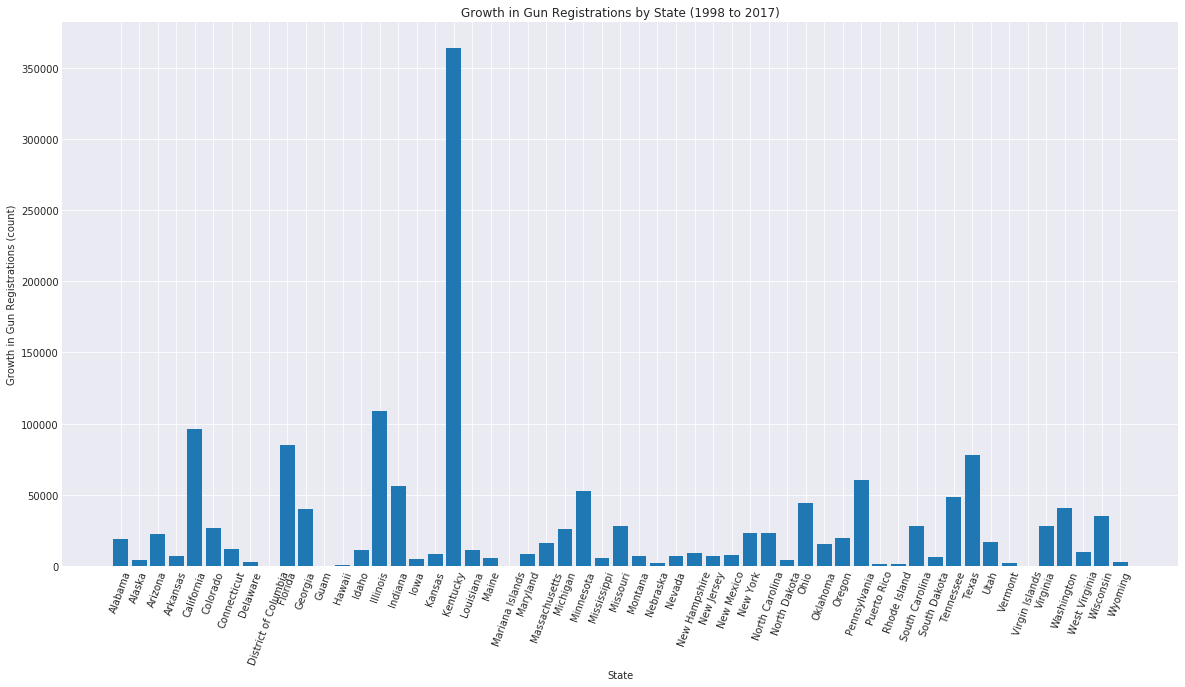

In [257]:
# plot growth in gun registrations by state
plt.figure(figsize=(20,10))
plt.bar(df_combined.state, df_combined['2017-1998']);
# needed to rotate xtick labels bc they were overlapping when horizontal
plt.xticks(df_combined.state, rotation=70)
plt.title('Growth in Gun Registrations by State (1998 to 2017)')
plt.xlabel('State')
plt.ylabel('Growth in Gun Registrations (count)');

We see that Kentucky has the highest growth in gun registrations. The figure is inordinately larger than the other states. This might be something we'd want to doubly-validate before reporting to others on this finding.

### Research Question 3: What is the overall trend of gun purchases?

In [258]:
# aggregate gun totals data by year
df_tot_by_yr_state = df_gun.groupby(['year','state'], as_index=False)['totals'].mean()
df_gun_byyr = df_gun.groupby('year', as_index=False)['totals'].mean().round(decimals=1)
df_gun_byyr.head()

,year,totals
0,1998,8108.2
1,1999,13702.6
2,2000,12768.3
3,2001,13363.7
4,2002,12677.4


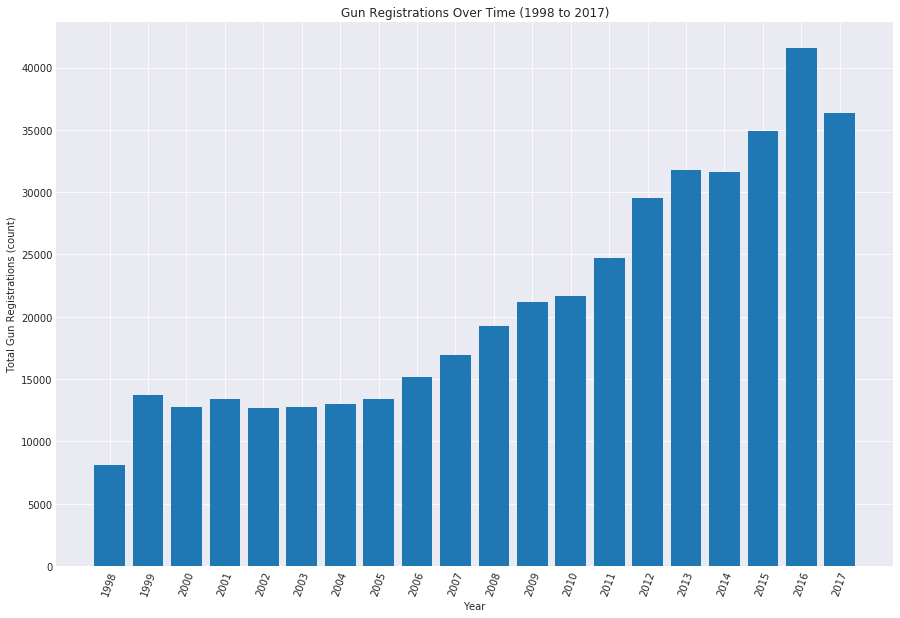

In [259]:
# plot gun registrations over time
plt.figure(figsize=(15,10))
plt.bar(df_gun_byyr.year, df_gun_byyr.totals);
plt.xticks(df_gun_byyr.year, rotation=70)
plt.title('Gun Registrations Over Time (1998 to 2017)')
plt.xlabel('Year')
plt.ylabel('Total Gun Registrations (count)');

<a id='conclusions'></a>
## Conclusions

<em>**Note**: I purposefully kept the tips and instructor notes referenced throughout this notebook in case I want to come back to this project and review the order/structure of what was entailed. As for the data, I want to reiterate that I used the 'totals' column in the gun dataset as a proxy for gun registrations or purchases since it wasn't entirely clear what columns such as 'permit' or 'handgun' meant.</em><br><br>
<em>**Conclusion from Question 1:**</em><br>
We have already commented a bit in-line above on our findings, but we can see in the scatterplots that none of the census attributes have a noticable positive or negative relationship with guns per capita. The linear regression models corroborate that notion, as well. With more time, we'd want to run more robust statistical tests to assess the relationship more concretely.<br><br>
<em>**Conclusion from Question 2:**</em><br>
As shown in the above chart, Kentucky has had the highest growth in gun registrations, followed by Illinois and California.<br><br>
<em>**Conclusion from Question 3:**</em><br>
The overall trend of gun purchases is that they are increasing. There is a slight dip from 2016 to 2017, but as we don't have data past 2017, we won't begin to draw conclusions as to whether this trend will hold or why this might be.<br><br>
Please refer to comments and markdown notes above and throughout the analysis for further findings and explanations.

In [260]:
# Student: I have no recollection of inputting the below code. Not deleting in case it's needed for the reviewer 
# or project in some way.
import statistics
import numpy as np
1, 5, 10, 3, 8, 12, 4, 1, 2, 8
1,1,2,3,4,5,8,8,10,12
5, 10, 3, 8, 12, 4, 1, 2, 8
ok = [1, 5, 10, 3, 8, 12, 4]
me = statistics.mean(ok)
ok1 = []
for c in ok:
    k = (c - me)**2
    ok1.append(k)
sum(ok1) / 7
#np.var(ok)
(statistics.pvariance(ok))**.5
wr = [15, 4, 3, 8, 15, 22, 7, 9, 2, 3, 3, 12, 6]
statistics.pvariance(wr)

33.928994082840234

# Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [261]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0